In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


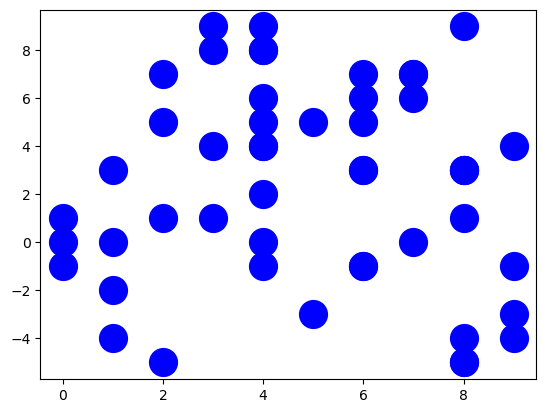

In [3]:
x = np.random.randint(0,10,50)
y = np.random.randint(-5,10,50)
plt.scatter(x, y, s=400, c="blue")
plt.show()


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


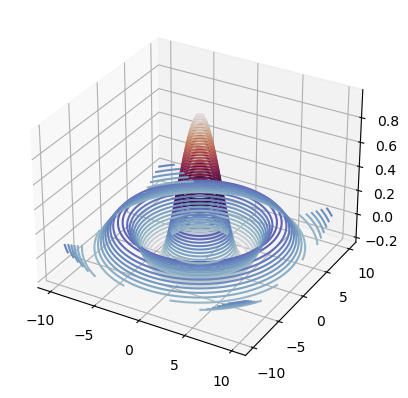

In [4]:
def f(x, y):
    return (np.sin(np.sqrt(x**2 + y**2))) / (np.sqrt(x**2 + y**2))

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='twilight')



3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


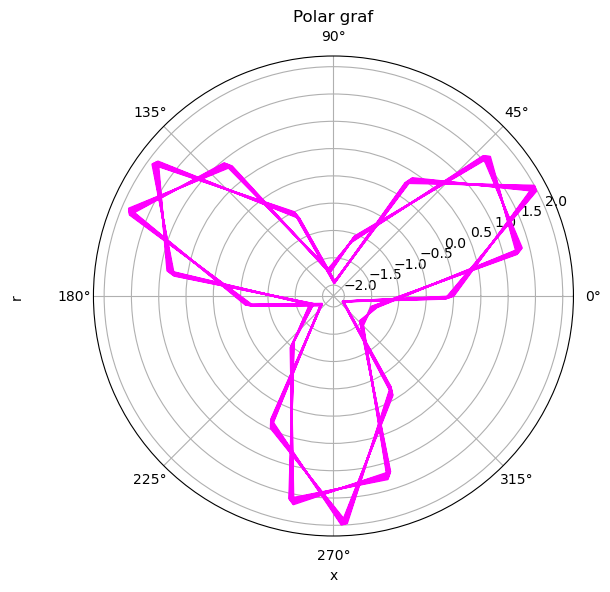

In [5]:
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)
theta = np.linspace(0,100,200)
t = 2*np.sin(3*theta)
ax.set_title('Polar graf')
ax.set_xlabel('x')
ax.set_ylabel('r',labelpad=50)
ax.plot(theta, t, color='magenta')


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


(array([ 1.,  0.,  3., 12., 16., 27., 30.,  8.,  1.,  2.]),
 array([-4.17458992, -3.42720936, -2.6798288 , -1.93244824, -1.18506769,
        -0.43768713,  0.30969343,  1.05707398,  1.80445454,  2.5518351 ,
         3.29921566]),
 <BarContainer object of 10 artists>)

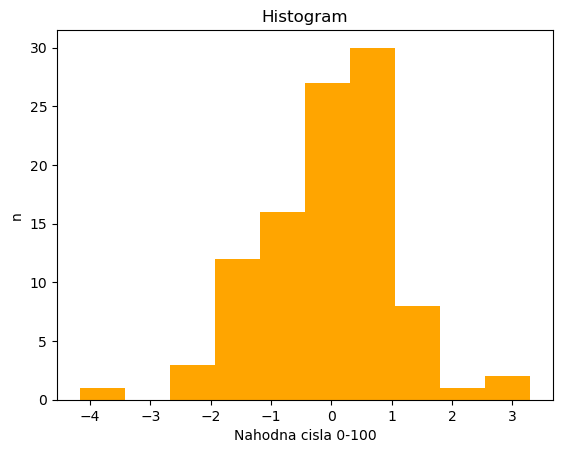

In [6]:
n = np.random.randn(100) 
plt.hist(n, 100)
plt.title("Histogram")
plt.ylabel("n")
plt.xlabel("Nahodna cisla 0-100")
plt.hist(n, color="orange")


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


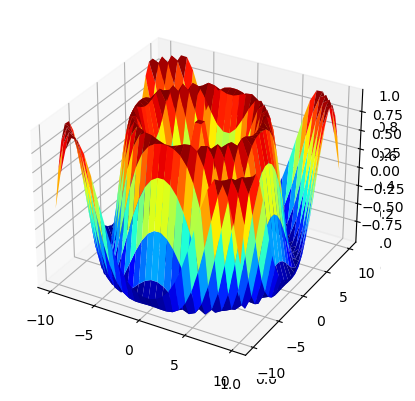

In [7]:
from mpl_toolkits import mplot3d
def f(x, y):
    return np.cos(np.sqrt(X**2 + Y**2))

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet')


# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [8]:
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    mat = np.zeros((n,n),dtype=int)
    s = n//2
    mat[s,s] = 1
    for i in range(1,s+1):
        if (i==1):
            a = np.arange(2,(i+3)+(i-1))
            mat[s-i,s-i:s+i] = a[::-1]
            #vlevo
            mat[s-i+1:s+i+1,s-i] = a + len(a)
            #dole
            mat[s+i,s-i+1:s+i+1] = a + 2*len(a)
            #vpravo
            mat[s-i:s+i,s+i] = a[::-1] + 3*len(a)
        else:
            a = np.arange(1,(i+2)+(i-1))
            mat[s-i,s-i:s+i] = a[::-1] + mat[s-i+1,s+i-1]
                #vlevo
            mat[s-i+1:s+i+1,s-i] = a + len(a) + mat[s-i+1,s+i-1]
                #dole
            mat[s+i,s-i+1:s+i+1] = a + 2*len(a)  + mat[s-i+1,s+i-1]
                #vpravo
            mat[s-i:s+i,s+i] = a[::-1] + 3*len(a) + mat[s-i+1,s+i-1]
    return mat 

In [24]:
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

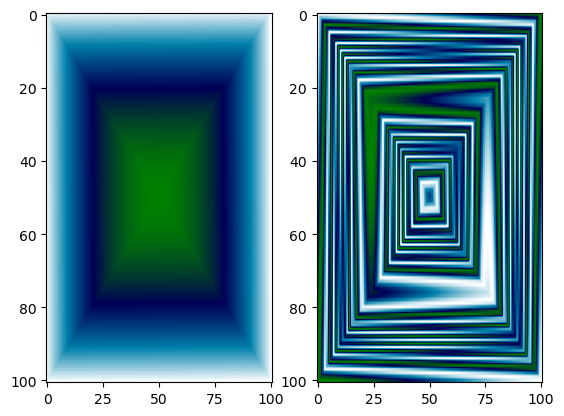

In [43]:
def imshow_numpy(n):
    fig, ax = plt.subplots(1, 2,)
    z = integer_spiral_numpy(n)
    ax[0].imshow(z, cmap = "ocean",aspect="auto")
    ax[1].imshow(np.sin(z*0.03), cmap = "ocean", aspect="auto")

imshow_numpy(101)

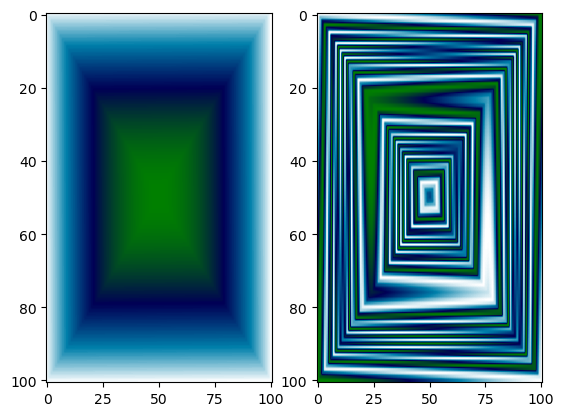

In [44]:
def imshow_notnumpy(n):
    fig, ax = plt.subplots(1, 2,)
    z = integer_spiral(n)
    ax[0].imshow(z, cmap = "ocean",aspect="auto")
    ax[1].imshow(np.sin(z*0.03), cmap = "ocean", aspect="auto")

imshow_notnumpy(101)

C:\Users\terka\AppData\Local\Temp\ipykernel_17976\2402360027.py:4: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[0].contour(z, cmap = "ocean",aspect="auto")
C:\Users\terka\AppData\Local\Temp\ipykernel_17976\2402360027.py:5: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[1].contour(np.sin(z*0.03), cmap = "ocean", aspect="auto")


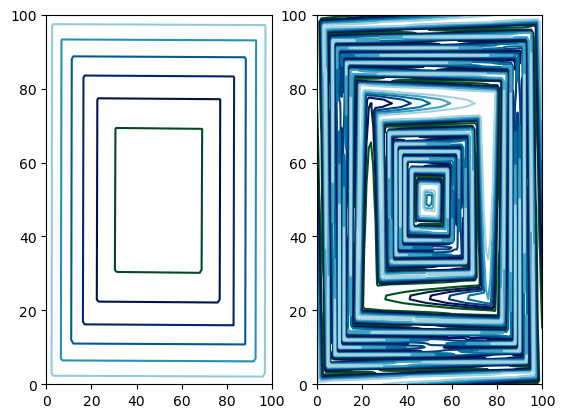

In [45]:
def contour_numpy(n):
    fig, ax = plt.subplots(1, 2,)
    z = integer_spiral_numpy(n)
    ax[0].contour(z, cmap = "ocean",aspect="auto")
    ax[1].contour(np.sin(z*0.03), cmap = "ocean", aspect="auto")

contour_numpy(101)

C:\Users\terka\AppData\Local\Temp\ipykernel_17976\1744078123.py:4: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[0].contour(z, cmap = "ocean",aspect="auto")
C:\Users\terka\AppData\Local\Temp\ipykernel_17976\1744078123.py:5: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[1].contour(np.sin(z*0.03), cmap = "ocean", aspect="auto")


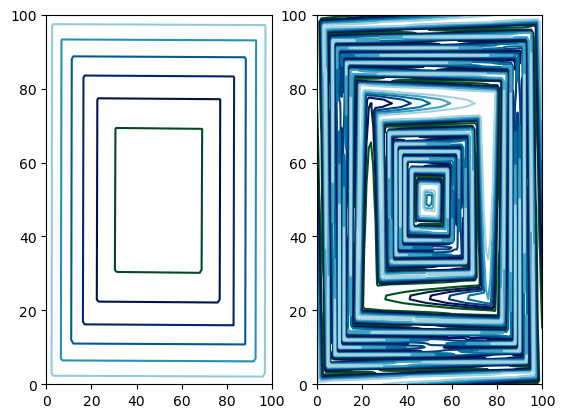

In [46]:
def contour_notnumpy(n):
    fig, ax = plt.subplots(1, 2,)
    z = integer_spiral(n)
    ax[0].contour(z, cmap = "ocean",aspect="auto")
    ax[1].contour(np.sin(z*0.03), cmap = "ocean", aspect="auto")

contour_notnumpy(101)

C:\Users\terka\AppData\Local\Temp\ipykernel_17976\2402360027.py:4: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[0].contour(z, cmap = "ocean",aspect="auto")
C:\Users\terka\AppData\Local\Temp\ipykernel_17976\2402360027.py:5: UserWarning: The following kwargs were not used by contour: 'aspect'
  ax[1].contour(np.sin(z*0.03), cmap = "ocean", aspect="auto")
C:\Users\terka\AppData\Local\Temp\ipykernel_17976\1538181421.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2,)


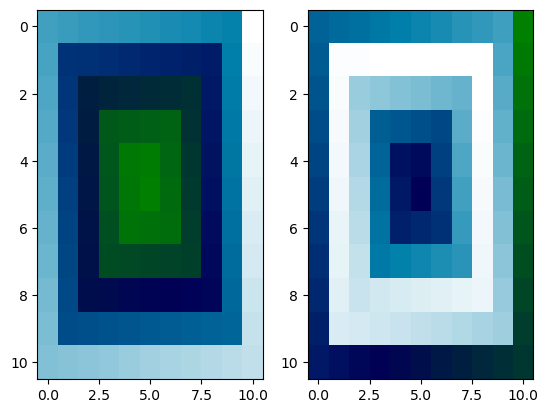

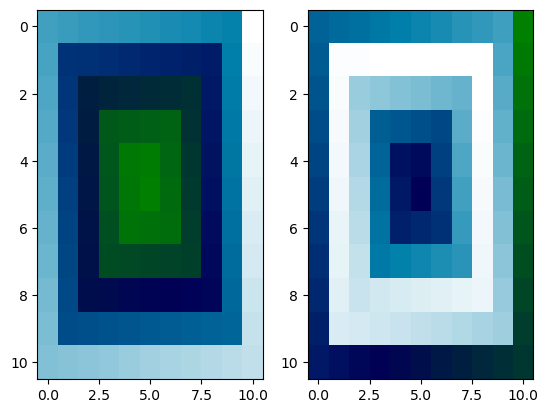

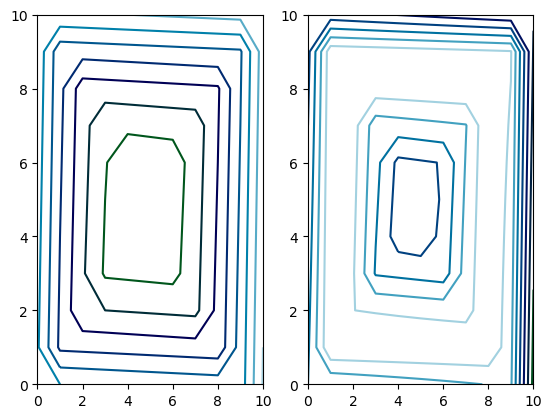

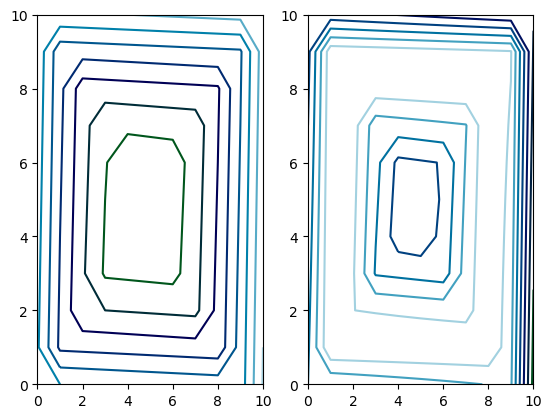

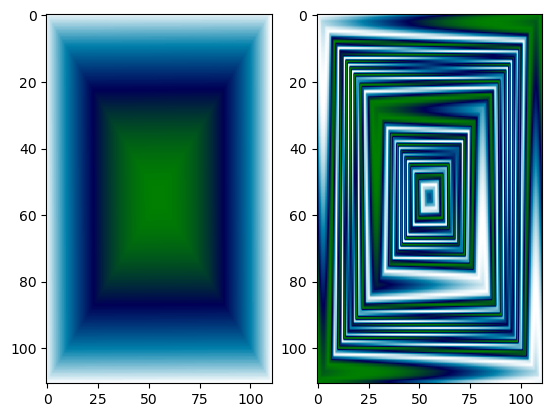

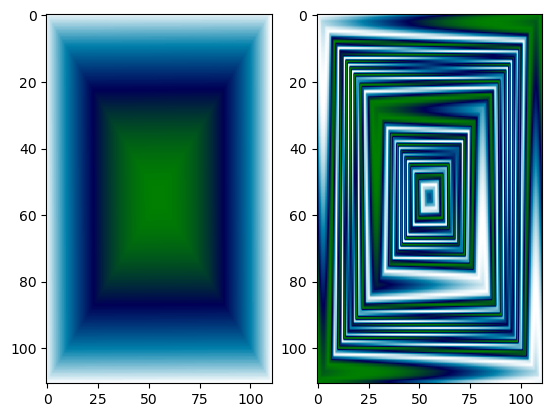

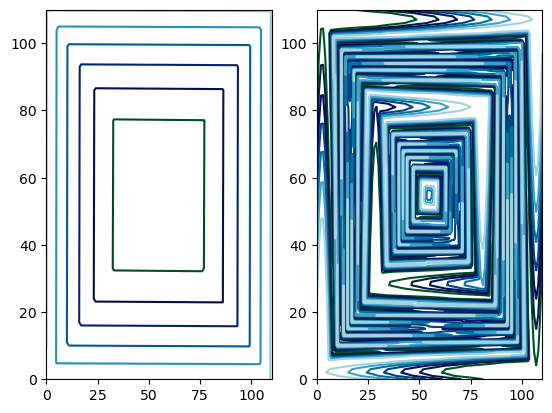

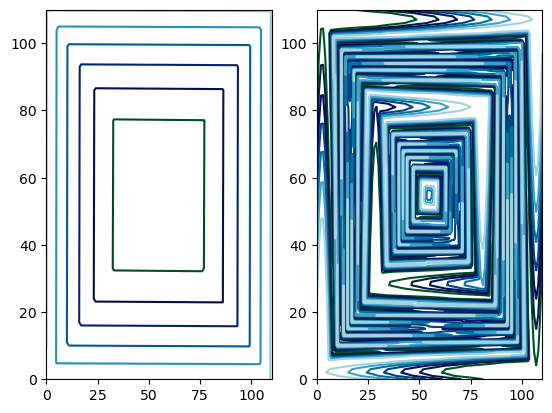

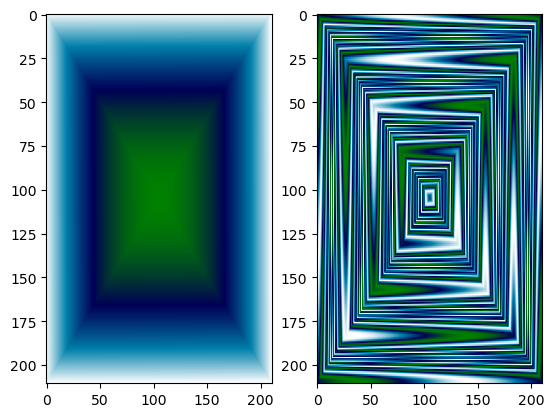

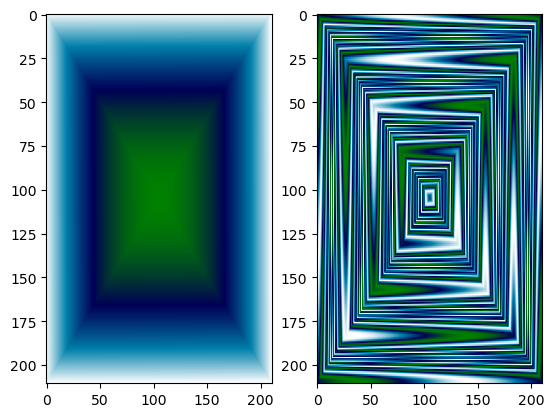

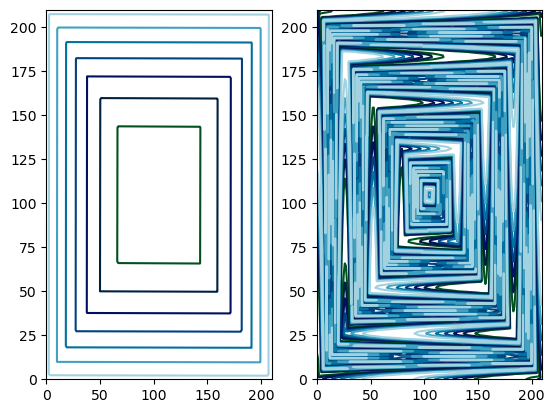

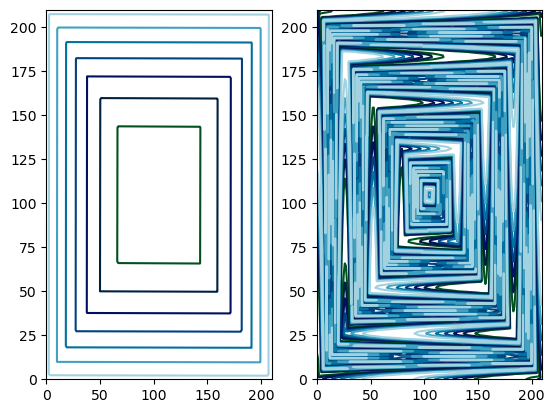

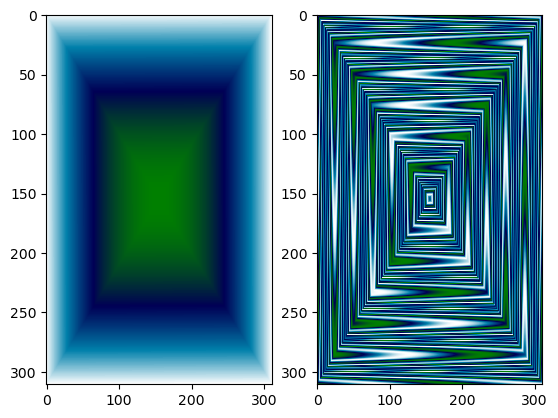

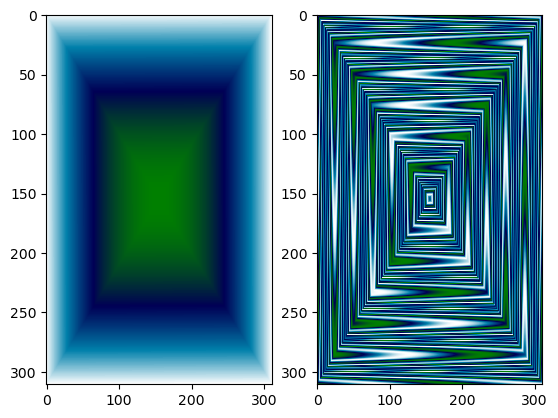

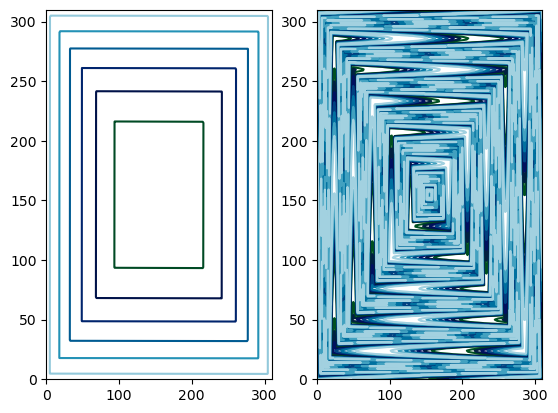

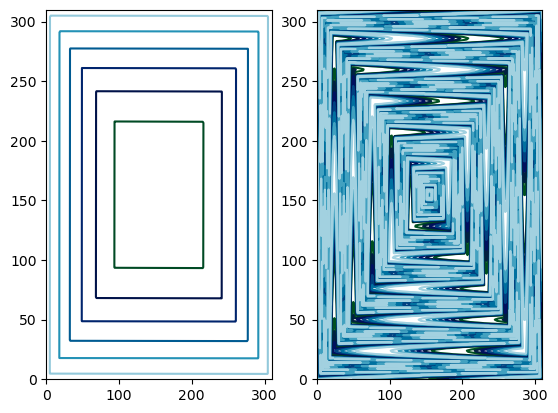

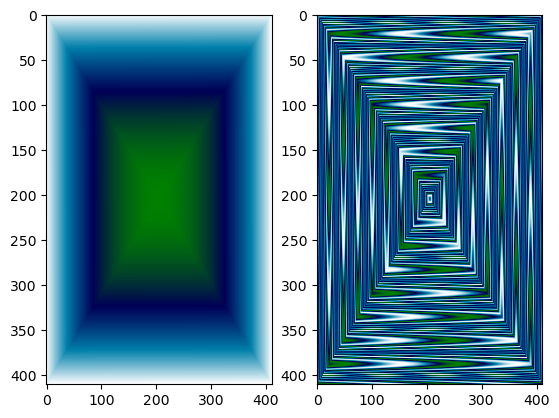

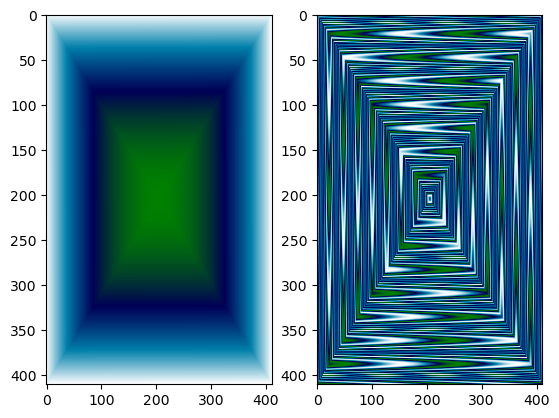

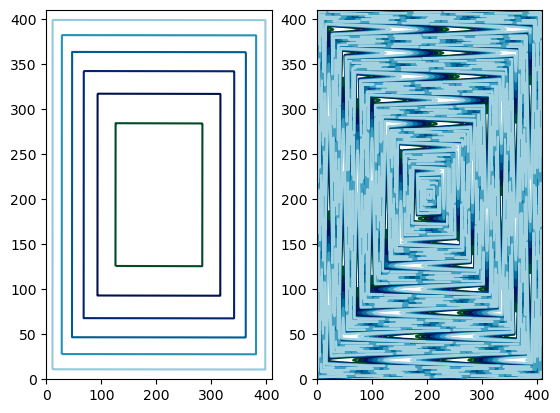

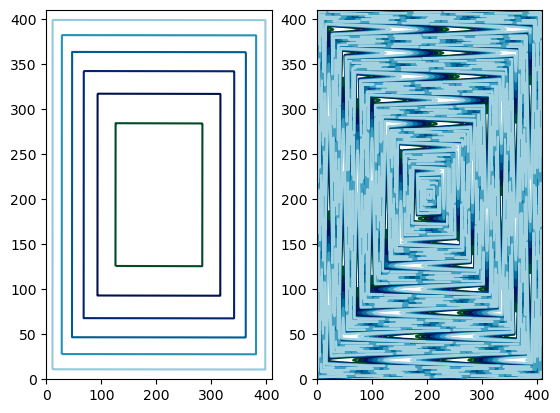

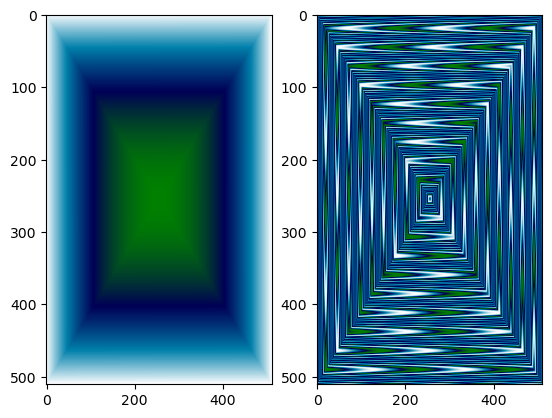

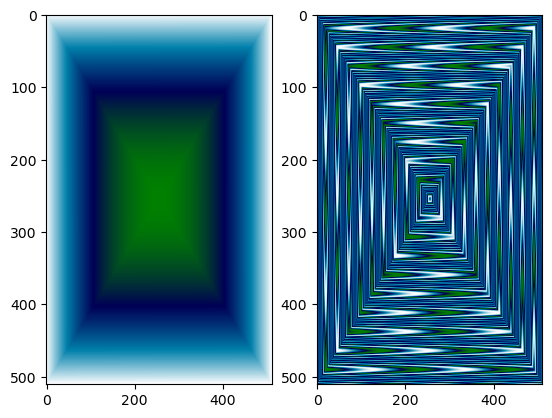

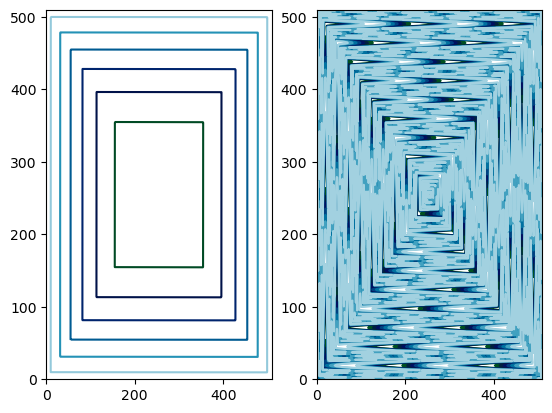

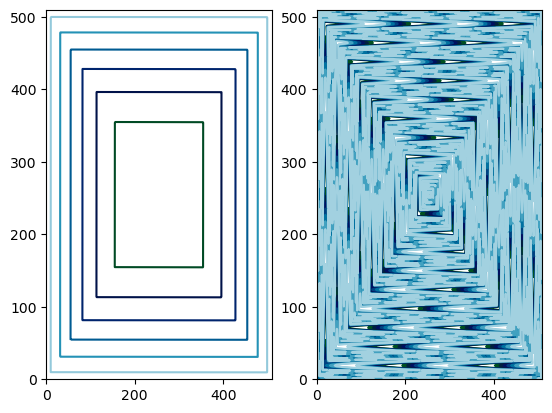

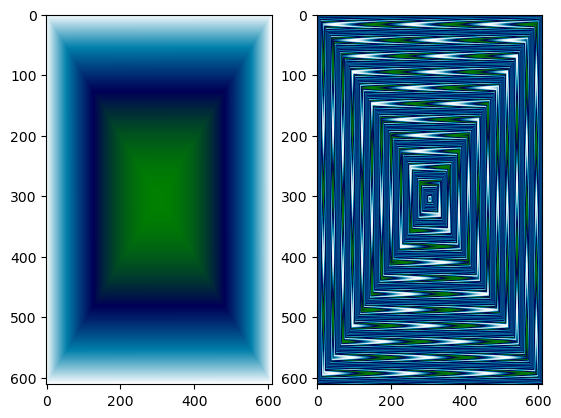

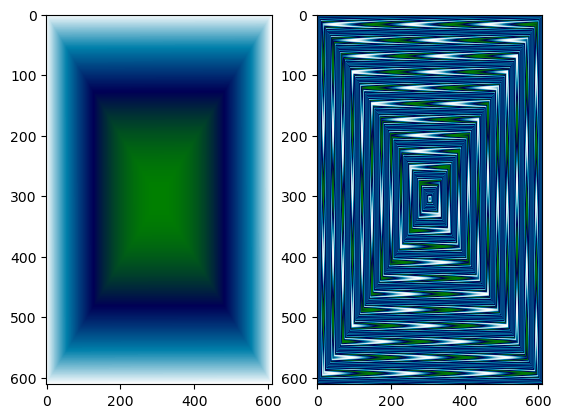

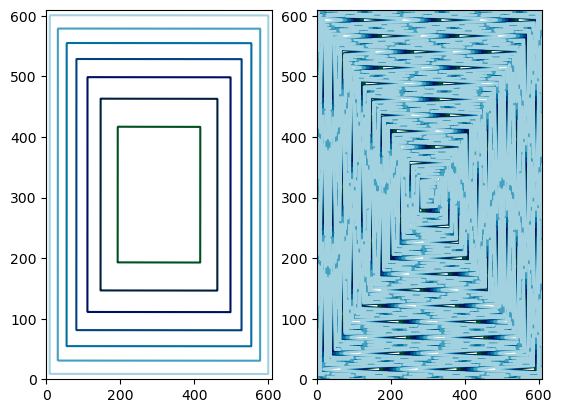

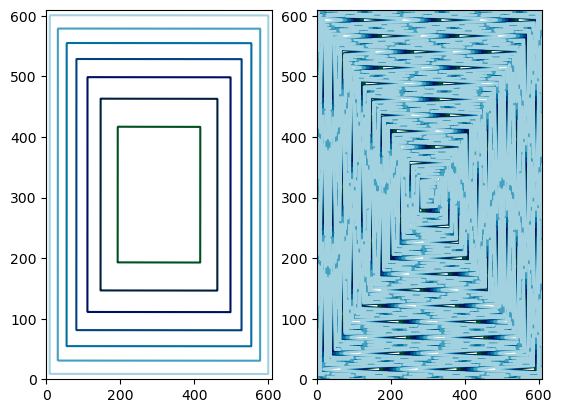

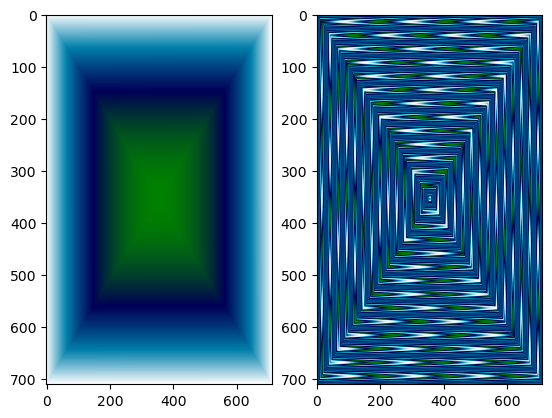

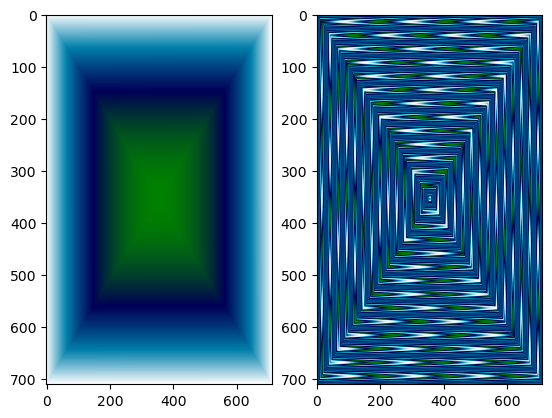

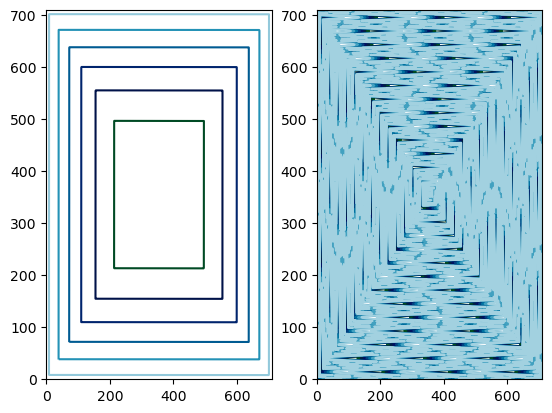

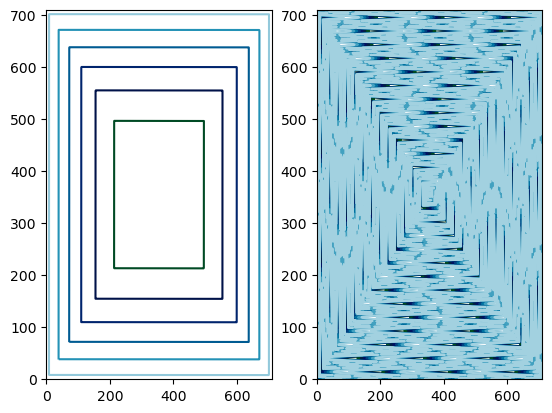

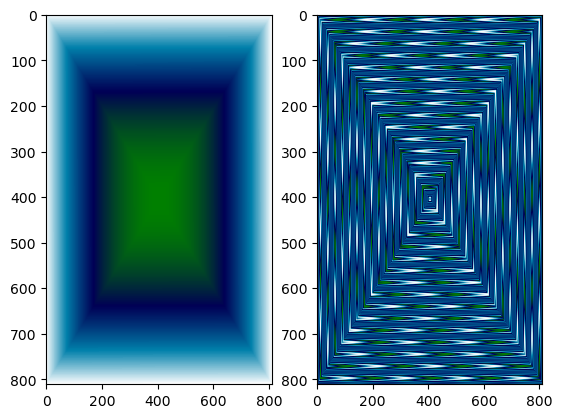

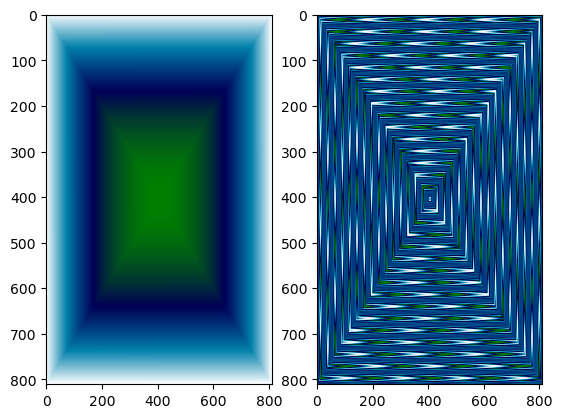

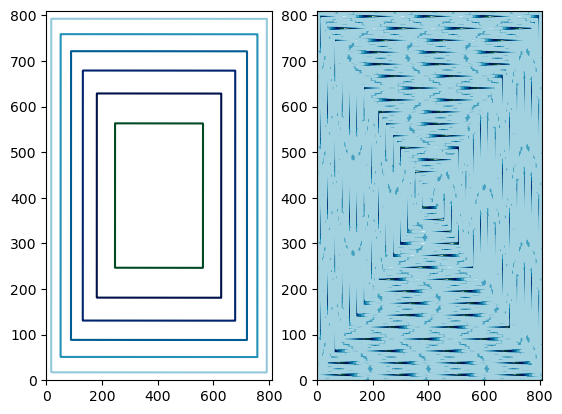

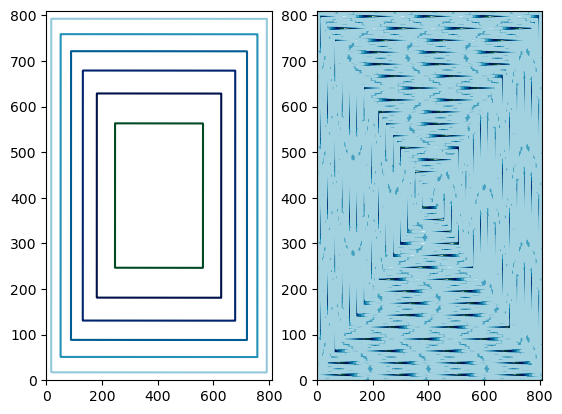

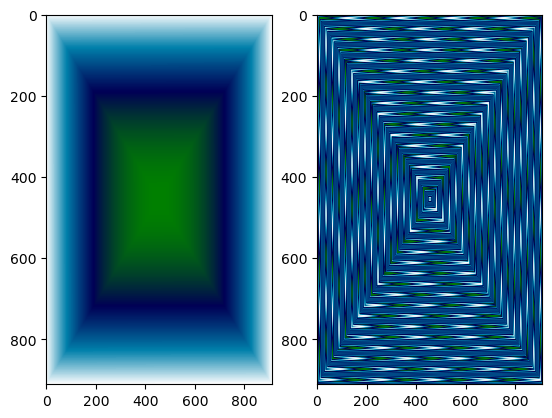

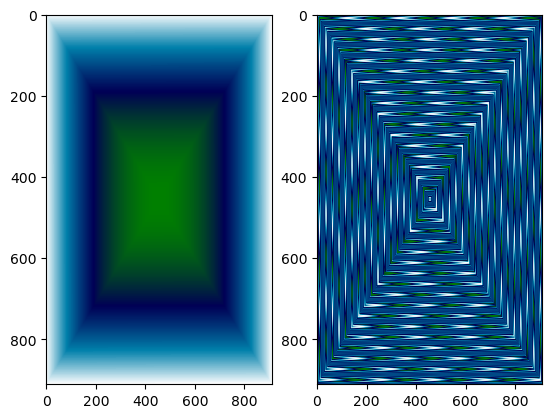

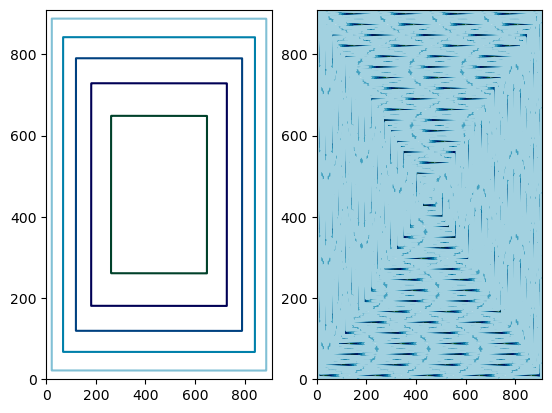

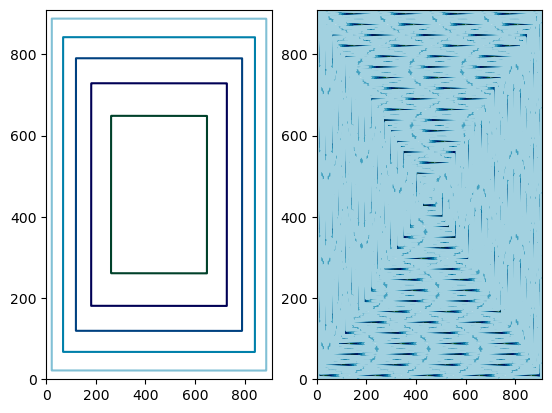

In [47]:
from time import time as t
numpy_imshow = []
numpy_contours = []
notnumpy_contours = []
notnumpy_imshow = []
for i in range(11,1002,100):
    start = t()
    imshow_numpy(i)
    stop = t()
    numpy_imshow.append(stop - start)

    start = t()
    imshow_notnumpy(i)
    stop = t()
    notnumpy_imshow.append(stop - start)

    start = t()
    contour_numpy(i)
    stop = t()
    numpy_contours.append(stop - start)

    start = t()
    contour_notnumpy(i)
    stop = t()
    notnumpy_contours.append(stop - start)

Text(0, 0.5, 'čas [s]')

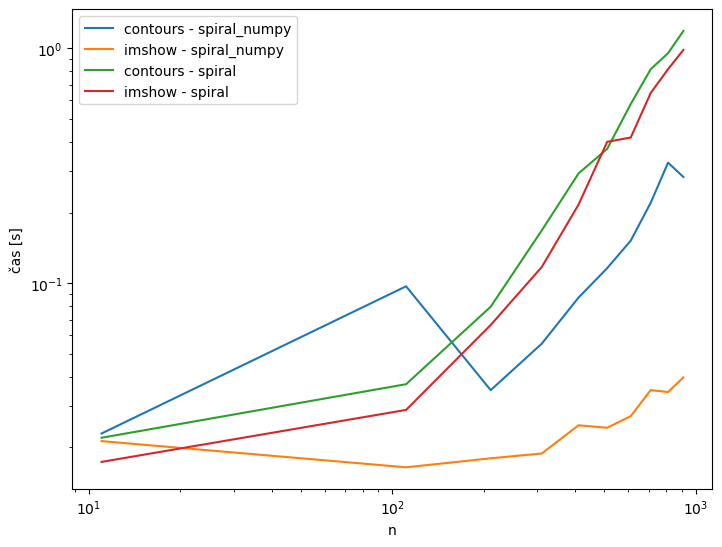

In [55]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
n =  range(11,1002,100)
ax.plot(n, numpy_contours, label="contours - spiral_numpy")
ax.plot(n, numpy_imshow, label="imshow - spiral_numpy")
ax.plot(n, notnumpy_contours, label="contours - spiral")
ax.plot(n, notnumpy_imshow, label="imshow - spiral")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
ax.set_xlabel('n')
ax.set_ylabel('čas [s]')

U všech funkcí se s rostoucím parametrem n zvyšuje časová náročnost.
Knihovna numpy snižuje časovou náročnost vykreslování, zvlášť u imshow doba trvání výrazně liší (oranžová).
Grafy contours jsou náročnější než grafy imshow.

Sklon značí exponenciální závislost. 

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.